In [55]:
import pandas as pd

In [56]:
df = pd.read_json("https://raw.githubusercontent.com/microsoft/MS-LaTTE/refs/heads/main/MS-LaTTE.json")

In [57]:
df.head()

,ID,TaskTitle,ListTitle,LocJudgements,TimeJudgements
0,3026964,rearrange closet,home,"[{'Known': 'yes', 'Locations': 'home', 'Public...","[{'Known': 'yes', 'Times': 'WE-morning'}, {'Kn..."
1,9829911,meeting tasks,work,"[{'Known': 'yes', 'Locations': 'work', 'Public...","[{'Known': 'yes', 'Times': 'WD-afternoon'}, {'..."
2,9099975,taste of home,groceries,"[{'Known': 'yes', 'Locations': 'home', 'Public...","[{'Known': 'yes', 'Times': 'WE-afternoon,WD-ev..."
3,8120843,bring book in,default list,"[{'Known': 'yes', 'Locations': 'public', 'Publ...","[{'Known': 'yes', 'Times': 'WD-afternoon,WD-ev..."
4,6533945,sociology paper,today,"[{'Known': 'yes', 'Locations': 'work', 'Public...","[{'Known': 'yes', 'Times': 'WD-morning,WD-afte..."


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10101 entries, 0 to 10100
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10101 non-null  int64 
 1   TaskTitle       10101 non-null  object
 2   ListTitle       10101 non-null  object
 3   LocJudgements   10101 non-null  object
 4   TimeJudgements  10101 non-null  object
dtypes: int64(1), object(4)
memory usage: 394.7+ KB


In [59]:
df['TaskTitle'].unique()

array(['rearrange closet', 'meeting tasks', 'taste of home', ...,
       'wig board', 'make kids dentist appointment', 'email joline'],
      dtype=object)

In [60]:
df['ListTitle'].unique()

array(['home', 'work', 'groceries', 'default list', 'today', 'to do',
       'trip list', 'dc trip', 'packing list', 'cleaning', 'packing',
       'home depot', 'school', 'camping', 'learning', 'to do list',
       'camping food', 'housework', 'camping trip', 'other', 'uni',
       'family', 'house renovations', 'to pack', 'thursday', 'money',
       'saturday', 'camping essentials', 'homework', 'house', 'rv',
       'things to do', 'dorm stuff', 'projects', 'to learn',
       'social studies', 'health', 'sunday', 'errands', 'trip', 'tasks',
       'living room', 'school work', 'house projects',
       'work packing list', 'shopping list', 'bunnings', 'to bring',
       'camping list', 'food shopping', 'chores', 'camping checklist',
       'home stuff', 'household', 'things to pack', 'business',
       'fishing gear', 'to do s', 'house to do list', 'restaurants',
       'questions', 'mountains', 'clothes packing', 'sleepover list',
       'monday', 'camping items', 'skills', 'car campi

In [61]:
df['TimeJudgements'][0]

[{'Known': 'yes', 'Times': 'WE-morning'},
 {'Known': 'yes', 'Times': 'WE-morning'},
 {'Known': 'yes', 'Times': 'WE-afternoon,WD-evening'},
 {'Known': 'yes', 'Times': 'WE-morning'},
 {'Known': 'yes', 'Times': 'WE-evening'}]

In [62]:
df['LocJudgements'][4]

[{'Known': 'yes', 'Locations': 'work', 'PublicLocations': ''},
 {'Known': 'yes', 'Locations': 'work', 'PublicLocations': ''},
 {'Known': 'yes', 'Locations': 'work', 'PublicLocations': ''}]

In [63]:
from collections import Counter

def most_common_time(judgements):
    times = []
    for entry in judgements:
        if entry['Known'] == 'yes':
            times.extend(entry['Times'].split(','))
    if times:
        return Counter(times).most_common(1)[0][0]
    return None

def most_common_location(judgements):
    locations = []
    for entry in judgements:
        if entry['Known'] == 'yes':
            locations.append(entry['Locations'])
    if locations:
        return Counter(locations).most_common(1)[0][0]
    return None

df['MostTime'] = df['TimeJudgements'].apply(most_common_time)
df['MostLocation'] = df['LocJudgements'].apply(most_common_location)

In [64]:
df[['TaskTitle', 'MostTime', 'MostLocation']].head()

,TaskTitle,MostTime,MostLocation
0,rearrange closet,WE-morning,home
1,meeting tasks,WD-afternoon,work
2,taste of home,WE-afternoon,home
3,bring book in,WD-evening,public
4,sociology paper,WD-morning,work


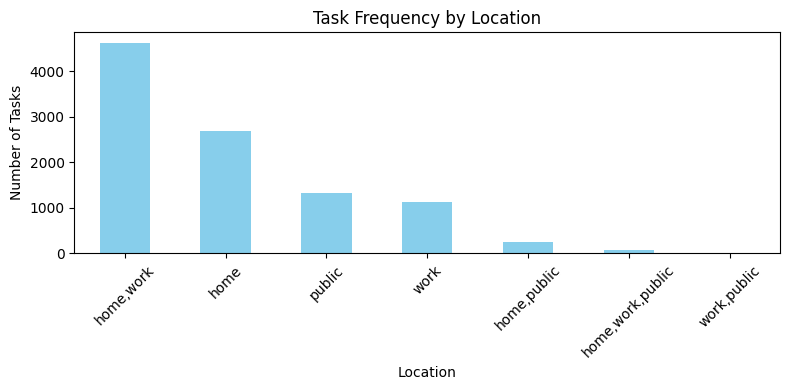

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot task frequency by location
plt.figure(figsize=(8, 4))
df['MostLocation'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Task Frequency by Location")
plt.xlabel("Location")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

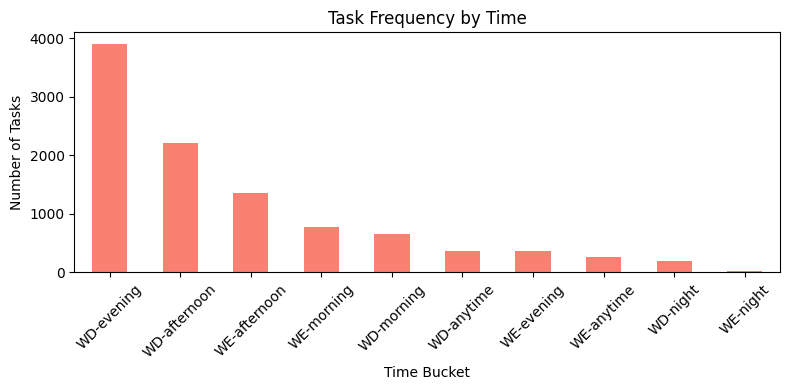

In [66]:
# Plot task frequency by time
plt.figure(figsize=(8, 4))
df['MostTime'].value_counts().plot(kind='bar', color='salmon')
plt.title("Task Frequency by Time")
plt.xlabel("Time Bucket")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [68]:
def preprocess(text):
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    tokens = [t for t in tokens if t not in string.punctuation and t not in stop_words]

    # Stemming
    tokens = [stemmer.stem(t) for t in tokens]

    return ' '.join(tokens)

# Apply to TaskTitle
df['CleanedTask'] = df['TaskTitle'].apply(preprocess)

In [69]:
df[['TaskTitle', 'CleanedTask']].head()

,TaskTitle,CleanedTask
0,rearrange closet,rearrang closet
1,meeting tasks,meet task
2,taste of home,tast home
3,bring book in,bring book
4,sociology paper,sociolog paper


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['CleanedTask'])

# Target Variable
y = df['MostTime']

In [71]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:

              precision    recall  f1-score   support

WD-afternoon       0.49      0.36      0.42       431
  WD-anytime       0.00      0.00      0.00        76
  WD-evening       0.41      0.88      0.56       765
  WD-morning       0.00      0.00      0.00       126
    WD-night       0.00      0.00      0.00        37
WE-afternoon       0.50      0.09      0.15       278
  WE-anytime       0.00      0.00      0.00        62
  WE-evening       0.00      0.00      0.00        79
  WE-morning       0.50      0.02      0.05       162
    WE-night       0.00      0.00      0.00         5

    accuracy                           0.42      2021
   macro avg       0.19      0.14      0.12      2021
weighted avg       0.37      0.42      0.32      2021



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
from sklearn.svm import LinearSVC

# Train
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:

              precision    recall  f1-score   support

WD-afternoon       0.44      0.45      0.44       431
  WD-anytime       0.09      0.01      0.02        76
  WD-evening       0.43      0.65      0.52       765
  WD-morning       0.13      0.05      0.07       126
    WD-night       0.24      0.11      0.15        37
WE-afternoon       0.31      0.24      0.27       278
  WE-anytime       0.00      0.00      0.00        62
  WE-evening       0.08      0.03      0.04        79
  WE-morning       0.38      0.28      0.32       162
    WE-night       0.00      0.00      0.00         5

    accuracy                           0.40      2021
   macro avg       0.21      0.18      0.18      2021
weighted avg       0.35      0.40      0.36      2021



In [74]:
def assign_priority(row):
    if row['MostTime'].startswith('WD'):
        return 'high'
    elif row['MostTime'].startswith('WE'):
        return 'medium'
    else:
        return 'low'
df['priority'] = df.apply(assign_priority, axis=1)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['CleanedTask'])
y = df['priority']

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df['priority'])  # Now y contains [0,1,2] instead of ['high','medium','low']

In [77]:
print(dict(zip(le.classes_, le.transform(le.classes_))))
# {'high': 0, 'low': 1, 'medium': 2}  (for example)

{'high': np.int64(0), 'medium': np.int64(1)}


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

In [ ]:
user_load = {
    'user1': 2,
    'user2': 5,
    'user3': 1
}

def assign_to_least_loaded(user_load):
    return min(user_load, key=user_load.get)

df['assigned_user'] = df.apply(lambda x: assign_to_least_loaded(user_load), axis=1)

# Update load
for user in df['assigned_user']:
    user_load[user] += 1

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)
print("Best accuracy:", grid_rf.best_score_)

In [ ]:
from sklearn.metrics import classification_report

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

print("Random Forest:\n", classification_report(y_test, rf_preds))
print("XGBoost:\n", classification_report(y_test, xgb_preds))

In [ ]:
import joblib

joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')